# Newton-Verfahren

## Auftrag

Implementieren Sie das Newton-Verfahren zur Bestimmung von Nullstellen von Funktionen.
(Dabei soll die Funktion als Sympy-Objekt eingegeben werden, so dass Sie mit Sympy die Ableitung davon bestimmen können.)

* Beschreiben Sie das Verfahren.
* Erstellen Sie eine Funktion `solve(f, x0)`, die eine Nullstelle von $f$ berechnet.
* Wenden Sie das Verfahren auf einige Beispiele an.
* Untersuchen Sie (empirisch), wie schnell das Verfahren konvergiert, wenn $x_0$ genügend nahe bei einer Nullstelle ist.

## Umgebung

Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* SymPy
* Matplotlib
* PrettyTable
* NumPy

In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install PTable

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### SymPy

SymPy ist eine Python-Programmierbibliothek für symbolische mathematische Berechnungen *(Sympy, 2019)*.

### Matplotlib

Bei Matplotlib handelt es sich um eine Programmierbibliothek für die Programmiersprache Python. Matplotlib ermöglicht eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, dass sie für fast alle Anwendungsbereiche geeignet sind *(Matplotlib, 2019)*.

### PrettyTable

PrettyTable ist eine Python-Programmierbibliothek, die es ermöglicht einfache ASCII-Tabellen mittels Python zu generieren *(PTable, 2015)*.

### Numpy

Bei NumPy handelt es sich um eine Programmierbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet NumPy effiziente Implementierungen von mathematischen Funktionen *(Numpy, 2019)*.

## Grunlegendes zum Newton-Verfahren

Mit dem Newton-Verfahren ist es möglich, die Nullstelle einer Funktion durch Annäherung zu bestimmen. Dieses Verfahren ist vor allem dann nützlich, wenn sich die Nullstelle nicht genau bestimmen lässt. Um eine Nullstelle zu bestimmen werden folgende Punkte benötigt:

* Eine Funktion $f$ die eine oder mehrere Nullstellen hat
* Die erste Ableitung dieser Funktion $f$
* Einen Startwert $x_0$, von diesem Wert wird das Newton-Verfahren gestartet  


Zuerst wird am Startwert $x_0$ die Tangente an die Funktion $f$ gelegt. Der Punkt an dem die Tangente angelegt wird, ist in Abbildung [Bild 1] Newton-Verfahren mit $P_0 =(x_0,f(x_0))$ gekennzeichnet. Die Tangente sollte nun die X-Achse schneiden, sofern der Startwert gut ausgewählt wurde. Dieser neue Schnittpunkt an der X-Achse ist der erste Nährungswert $x_1$ der gesuchten Nullstelle. Die Definition von $x_1$ kann durch die Tangentengleichung hergeleiten werden. Die Tangentengleichung lautet wie folgt:    

$$y=f(x_0)+(x_1-x_0)*f'(x_0)=0$$

Aus welcher sich durch Umfornmen die Definitin von $x_1$ ergibt:  

$$x_1=x_0-\frac{f(x_0)}{f'(x_0)}$$ 

Mit dem ersten Nährungswert $x_1$, kann ein neuer Punkt $P_1=(x_1,f(x_1))$ ermittelt werden. Bei diesem Punkt $P_1$ wird eine neue Tangente angelegt, deren Schnittpunkt mit der X-Achse den neuen Nährungswert $x_2$ darstellt. Dieses Verfahren lässt sich nun beliebig oft wiederholen, je nachdem wie genau der approximierte Wert gewünscht wird. Dies lässt sich  rekursiv definieren als *(G. Teschl, 2014)*:  

$$x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}: n\in\mathbb{N}$$

![Bild 1](img/Diff_Anw_Abl_Newton1.png)  
[Bild 1] Newton-Verfahren *(mathelike, 2020)*

Nebst dem Newton-Verfahren gibt es noch das Sekanten-Verfahren. Hier werden anstelle von Tangenten Sekanten verwendet, um die Nullstelle iterativ zu bestimmen. In dieser Arbeit wird jedoch nicht detailliert auf diese Variante eingegangen *(Mathepedia, 2020)*. 

### Wahl des Startwerts $x_0$

Die Auswahl des Startwerts ist insofern wichtig, da bei einer schlechten Wahl im schlimmsten Fall keine Annährung an den Nullpunkt möglich ist. Beispiel hierfür währe ein Startwert, welcher eine Tangente ergibt die parallel zur X-Achse verläuft.   
Die erste Tangente an $P_0$ sollte die Funktion $f$ möglichst gut annähern. Um ein geigneten Startwert zu ermitteln gibt es mehrere Verfahren.

* Die Funktion $f$ skizzieren
* Suche nach einem Vorzeichenwechsel der Funktionswerte
* Die Gleichung durch Termumformung in zwei einfachere Funktionen aufspalten

### Abbruchkriterien

Neben dem Startwert wird auch eine Abbruchbedingung benötigt. Damit nicht unendlich lang an die gesuchte Nullstelle heran approximiert wird. Ein mögliches Abbruchkriterium könnte wie folgt definiert werden:  

$|x_{n+1}-x_n|<\epsilon_1$  

Hier bestimmt $\epsilon_1$ die Qualität der Nullstelle.  
Weiter kann noch definiert werden, auf wie viele Kommastellen sich die zwei Werte $x_n$ und $x_{n-1}$ gleich sein müssen *(G. Teschl. 2014)*.

## Implementierung

Die Funktion `solve` enthält zwei Parameter. Der erste Parameter ist die Funktion $f$ für welche eine Nullstelle gesucht wird und der zweite Parameter ist der Startwert $x_0$. Die Funktion $f$ muss als mathematisches Sympy-Symbol der Funktion übergeben werden. Zu Beginn wird die Ableitung der Funktion $f$ mit der Sympy-Programmierbibilothek berechnet. Danach startet eine Schleife, in welcher das Newton-Verfahren angewendet wird. Die Schleife wird beendet, wenn der Betrag zwischen der zuvor berechneten Nullstelle minus der aktuell berechneten Nullstelle kleiner als $1\mathrm{e}{-15}$ ist. Wird diese Abbruchbediungung nicht innerhalb 100 Iterationen erreicht, wird die Schleife trotzdem beendet. Dies bietet die Sicherheit, wenn eine Funktion ohne Nullstelle eingegeben wird, dass die Methode terminiert, oder bei einem schlecht gewählten Startwert nicht über längere Zeit rechnet.

In [5]:
import sympy as sp

def solve(f, x0):
    """ 
    Ermittelt die Nullstelle für die Funktion f mit dem Startwert x0.
    @param: Funktion f: Sympy-Funktion als mathematischen Ausdruck
    @param: int x0: Startwert für das Newton-Verfahren
    @return: Die angenäherten Nullstellen (alle Iterationen) von der Funktion f mit dem Startwert x0
    """
    
    # Erste Ableitung der Funktion ermitteln.
    x = sp.Symbol('x')
    ableitung_f = sp.diff(f, x)
    
    x_nullstelle = 0
    xn = x0
    nullstellen_iterationen = list()
    
    # Nullstelle iterativ bestimmen.
    for _ in range(100):
        try:
            x_nullstelle = xn - (f.subs(x, xn) / ableitung_f.subs(x, xn))
        except ZeroDivisionError:
            raise Exception('Division durch 0')
        except AttributeError:
            raise Exception('Funktion muss Symbol x enthalten')
        
        # Abbruchbedingung.    
        if sp.Abs(x_nullstelle - xn) < 1e-15:
            break
        
        nullstellen_iterationen.append(x_nullstelle)
        xn = x_nullstelle
        
    return nullstellen_iterationen

### Berechnungen und Auswertungen

Für die folgenden Funktionen wird nun eine Nullstelle mit dem Newton-Verfahren berechnet:

* $f_1(x)=x+1$
* $f_2(x)=x^2$
* $f_3(x)=x^3 - 6x^2 + 4x + 12$

Zuerst werden die drei Funktionen in einer Liste zusammengefasst, damit die darauffolgenden Snippets kleienr gehalten werden können und somit übersichtlicher sind.

In [6]:
import sympy as sp


x = sp.Symbol('x')

f_1 = x + 1
f_2 = x**2
f_3 = x**3 + 6*x**2 + 4*x - 12

"""
Liste aus:
- Funktion f
- Startwert x0
- Max. und Min. Bereich des Graphen
- Bezeichnung der Funktion f 
"""
funktionen = [(f_1, 2, -3, 3, r"$f(x)=x+1$"),
              (f_2, 3, -4, 4, r"$f(x)=x^2$"),
              (f_3, -1, -5, 2, r"$f(x)=x^3-6x^2+x+12$"),
              (f_3, 0, -5, 2, r"$f(x)=x^3-6x^2+x+12$")]

In [7]:
from prettytable import PrettyTable


"""
Erstellt eine einfache Tabelle, welche für die Funktionen
- den angenäherten Nullpunkt,
- den Startwert,
- und die Anzahl Iterationen ausgiebt.
"""

tabelle = PrettyTable()
tabelle.field_names = ["Funktion", "Nullstelle", "Startwert", "Iterationen"]

for f, x0, start, ende, f_text in funktionen:
    try:
        nullstellen_iterationen = solve(f, x0)
        # Die angenäherte Nullstelle befindet sich am Ende des Arrays.
        nullstelle = float(nullstellen_iterationen[-1])
        tabelle.add_row([f, nullstelle, x0, len(nullstellen_iterationen)])
    except Exception as e:
        print(f'Fehler: {f} - {str(e)}')
                
print(tabelle)

+--------------------------+------------------------+-----------+-------------+
|         Funktion         |       Nullstelle       | Startwert | Iterationen |
+--------------------------+------------------------+-----------+-------------+
|          x + 1           |          -1.0          |     2     |      1      |
|           x**2           | 1.3322676295501878e-15 |     3     |      51     |
| x**3 + 6*x**2 + 4*x - 12 |  -2.5173040450083057   |     -1    |      6      |
| x**3 + 6*x**2 + 4*x - 12 |   1.051374241731037    |     0     |      7      |
+--------------------------+------------------------+-----------+-------------+


Aus der Tabelle ist ersichtlich, dass die Nullstelle mit wenigen Iterationen (unter zehn Wiederholungen) angenähert werden konnte. Die zweite Funktion $f(x)=x^2$ benötigte als einzige mehr als zehn Iterationen um eine Annäherung auf $1\mathrm{e}{-15}$ zu erreichen. Dies kommt daher, dass eine Tangente an der gesuchten Nullstelle eine Gerade bildet welche, pararell zur X-Achse verläuft. Im zweiten Teil dieses Kapitel wird noch genauer darauf eingegengen. Die erste Funktion benötigt nur eine Iteration, da die Tangente selbst die Funktion ist. Bei der dritten Funktion gibt es zwei Nullstellen und je nach Startwert wird die eine oder andere Nullstelle angenähert.

Das darauf folgende Snippet erstellt zu den oben angenäherten Nullstellen Graphen.

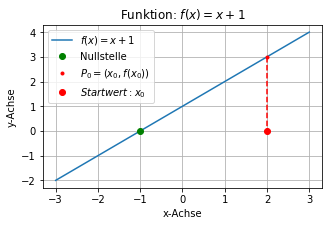

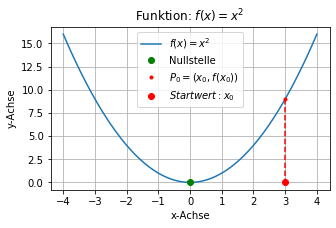

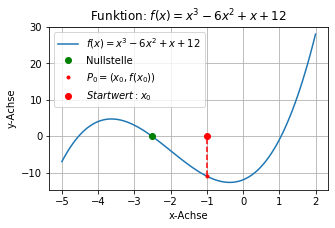

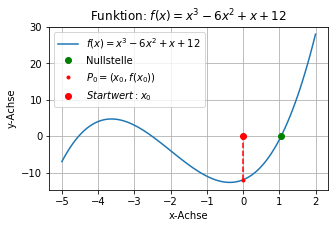

In [9]:
import numpy as np
import matplotlib.pyplot as plt


"""
Erstellt für jede Funktion eine Graphen, welcher die
- Funktion,
- die berechnete Nullstelle,
- den Startwert x0 
- und den Punkt P0 darstellt.
"""

for f, x0, start, ende, f_text in funktionen:
    try:
        nullstellen_iterationen = solve(f, x0)
       
        # Daten für den Graph aufbereiten
        x_values = np.linspace(start, ende, 100)
        y_values = []

        for x_value in x_values:
            y_value = f.subs(x, x_value)
            y_values.append(y_value)

        # Graph erstellen
        plt.figure(figsize=(5,3))
        plt.title(f'Funktion: {f_text}')
        plt.xlabel('x-Achse')
        plt.ylabel('y-Achse')
        plt.grid(True)
        
        # Funktion f in den Graphen zeichnen
        plt.plot(x_values, y_values, label=f_text)
        
        # Nullstelle in den Graphen zeichnen
        plt.plot(float(nullstellen_iterationen[-1]), 0, 'og', label='Nullstelle')
        
        # Startwert x0 und P0 in den Graphen zeichnen und mit vertikaler Linie verbinden
        plt.plot(x0, f.subs(x, x0), '.r', label=r"$P_0=(x_0, f(x_0))$")
        plt.plot(x0, 0, 'or', label=r"$Startwert: x_0$")
        plt.plot([float(x0), float(x0)], [f.subs(x, x0), 0], '--r')
        
        plt.legend()
        plt.show()
    except Exception as e:
        print(str(e))

Um herauszufinden wie schnell das Verfahren an eine Nullstelle einer Funktion konvergiert, wurde die Methode `solve` so implementiert, dass bei jeder Iteration die Werte gespeichert werden. Somit liefert die Methode `solve` nicht nur die angenäherte Nullstelle, sondern eine Liste mit allen Annäherungen. Diese Liste wir in dem darauffolgendem Snippet visualisiert.

Angenäherte Nullstelle: -1.00000000 nach 1 Iterationen,


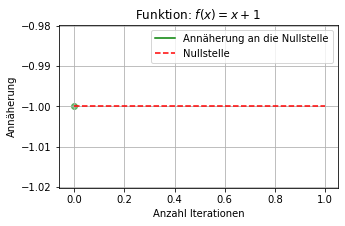

Angenäherte Nullstelle: 0.00000000 nach 51 Iterationen,


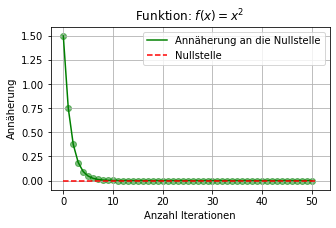

Angenäherte Nullstelle: -2.51730405 nach 6 Iterationen,


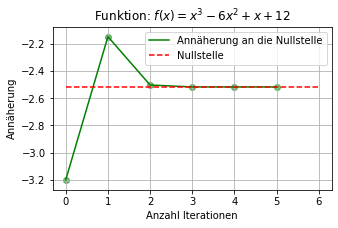

Angenäherte Nullstelle: 1.05137424 nach 7 Iterationen,


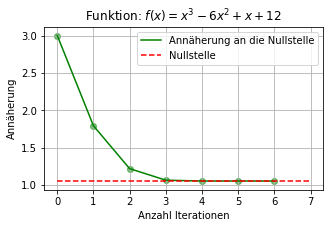

In [10]:
import numpy as np
import matplotlib.pyplot as plt


for f, x0, start, ende, f_text in funktionen:
    try:
        nullstellen = solve(f, x0)
        print('Angenäherte Nullstelle: {:.8f} nach {} Iterationen,'.format(float(nullstellen[-1]), len(nullstellen)))
        
        # Graph erstellen  
        plt.figure(figsize=(5,3))
        plt.title(f'Funktion: {f_text}')
        plt.xlabel('Anzahl Iterationen')
        plt.ylabel('Annäherung')
        plt.grid(True)
        
        # Annäherungen in den Graphen zeichnen
        plt.scatter(range(len(nullstellen)), nullstellen, color='g', alpha=0.5)
        plt.plot(range(len(nullstellen)), nullstellen, 'g', label="Annäherung an die Nullstelle")
        
        # Angenäherte Nullstelle einzeichnen
        plt.plot([0, len(nullstellen)], [float(nullstellen[-1]), float(nullstellen[-1])], '--r', label='Nullstelle')
        
        plt.legend()
        plt.show()
    except Exception as e:
        print(str(e))

Aus den Graphen ist zu entnhemen, dass nach den ersten fünf Iterationen die Annäherung schon "sehr" genau ist und sich bei weiteren Iterationen die Nährungswerte zu einer Geraden formieren. Bei der zweiten Funktion sind die approximierten Nährungswerte auch schon nach wenigen Iterationen nahe an der Nullstelle. Weitere Iterationen werden nur durchgeführt, da das Abbruchkriterium mit $1\mathrm{e}{-15}$ sehr fein eingestellt ist. Dies führt dazu, dass die approximierten Nährungswerte sich nun noch im hinteren Kommastellenbereich verändern. Somit kann gesagt werden, dass bei den drei verwendeten Funktionen das Verfahren schnell konvergiert *(G. Teschl, 2014)*.

## Fazit

Mit dem Newton-Verfahren ist es erstaunlich einfach, eine Nullstelle zu finden bzw. sich dieser mit wenigen Iterationen anzunähern. Die Schwierigkeit liegt jedoch darin, den korrekten Startwert zu ermitteln. Denn wenn ein falscher Wert bestimmt wird, kann es entweder sehr lange dauern, bis die Nullstelle gefunden wird, da viele Iterationen nötig sind oder es kann überhaupt keine Nullstelle gefunden werden.

## Litaraturverzeichnis

Matplotlib. (2020). *Matplotlib*. Abgerufen am 07.05.2020 von https://matplotlib.org/  
Sympy. (2020). *Sympy*. Abgerufen am 07.05.2020 von https://www.sympy.org/en/index.html  
NumPy Developers. (2020). *NumPy*. Abgerufen am 07.05.2020 von https://numpy.org/  
PTable. (2015). *PTable*. Abgerufen am 12.04.2020 von https://ptable.readthedocs.io/en/latest/tutorial.html   
mathelike. (2020). *Newton-Verfahren*. Abgerufen am 07.05.2020 https://www.mathelike.de/abi-check-mathe-abi-skript-bayern/1-analysis/1-5-differentialrechnung/1-5-5-newton-verfahren.html  
Mathepedia. (2020). *Mathepedia, Sekantenverfahren*. Abgerufen am 07.05.2020 https://mathepedia.de/Sekantenverfahren.html  
G. Teschl, S. Teschl. (2014) *Mathematik für Informatiker*. Springer-Verlag Berlin Heidelberg.